# Zomato Data Analysis

## Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load DataSet and preview the data

In [60]:
dataframe = pd.read_csv("zomato_data.csv")

In [70]:
df = dataframe.copy()
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [64]:
print(df.tail())

                 name online_order book_table   rate  votes  \
143  Melting Melodies           No         No  3.3/5      0   
144   New Indraprasta           No         No  3.3/5      0   
145      Anna Kuteera          Yes         No  4.0/5    771   
146            Darbar           No         No  3.0/5     98   
147     Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
143                          100          Dining  
144                          150          Dining  
145                          450          Dining  
146                          800          Dining  
147                          200          Dining  


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rating                       148 non-null    object 
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
 7   rate                         148 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 9.4+ KB


In [78]:
# Rename the column 'rate' to 'rating'
df.rename(columns={'rate': 'rating'}, inplace=True)

In [72]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)


In [87]:
df['rating']=df['rating'].apply(handleRate)
print(df.head())

                    name online_order book_table  rating  votes  \
0                  Jalsa          Yes        Yes     4.1    775   
1         Spice Elephant          Yes         No     4.1    787   
2        San Churro Cafe          Yes         No     3.8    918   
3  Addhuri Udupi Bhojana           No         No     3.7     88   
4          Grand Village           No         No     3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rating                       148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Visualizations

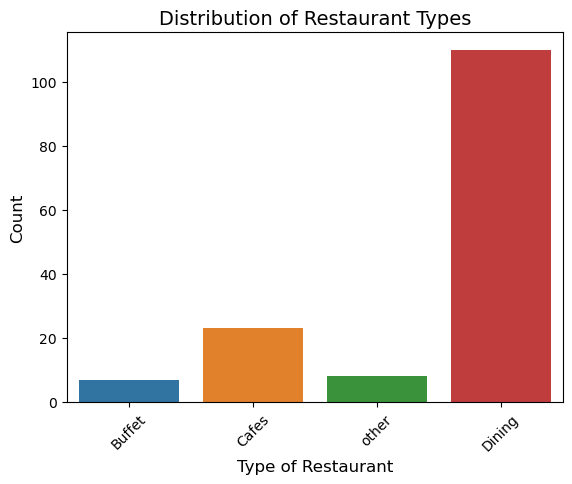

In [183]:
sns.countplot(data=df, x='listed_in(type)', hue='listed_in(type)', legend='auto')
plt.xlabel("Type of Restaurant", fontsize=12)  # X-axis label
plt.ylabel("Count", fontsize=12)  # Y-axis label
plt.title("Distribution of Restaurant Types", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Conclusion: The majority of the restaurants fall into the dining category.

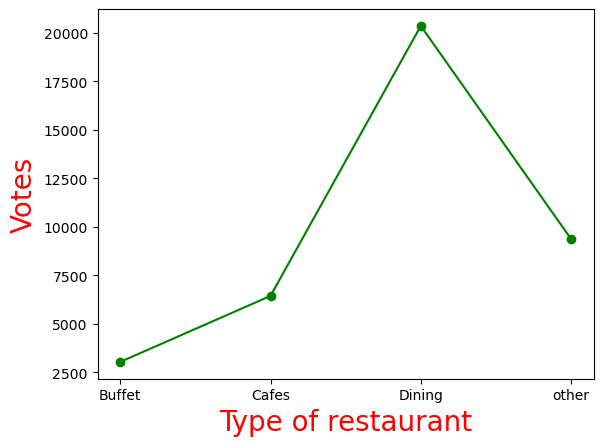

In [131]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)
plt.show()

### Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [169]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']


In [171]:

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    4884
Name: name, dtype: int64


<Axes: xlabel='online_order', ylabel='count'>

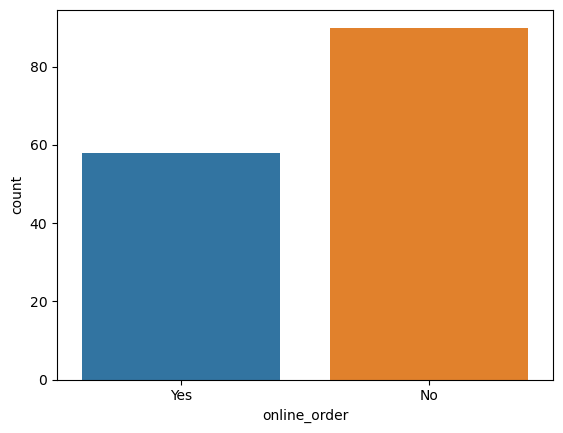

In [179]:
sns.countplot(data=df,x='online_order',hue='online_order')

### Conclusion: This suggests that a majority of the restaurants do not accept online orders.

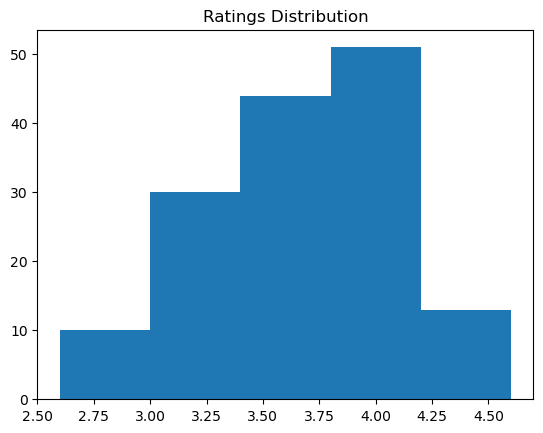

In [189]:
plt.hist(df['rating'],bins=5)
plt.title('Ratings Distribution')
plt.show()

### Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.



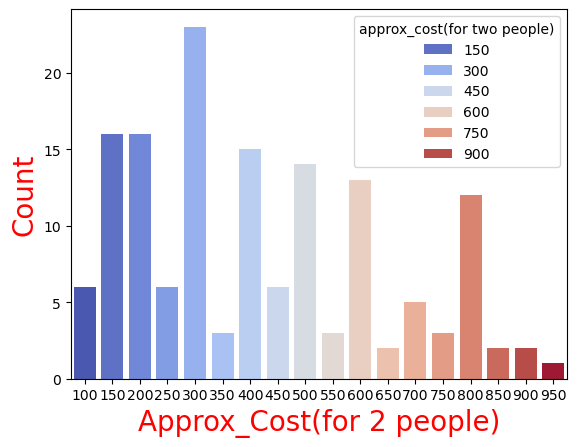

In [241]:
couple_data=df['approx_cost(for two people)']
plt.xlabel('Approx_Cost(for 2 people)', c='red', size=20)
plt.ylabel('Count', c='red', size=20)
sns.countplot(data=df, x='approx_cost(for two people)', hue='approx_cost(for two people)',palette='coolwarm',legend='auto')
plt.show()


### Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.



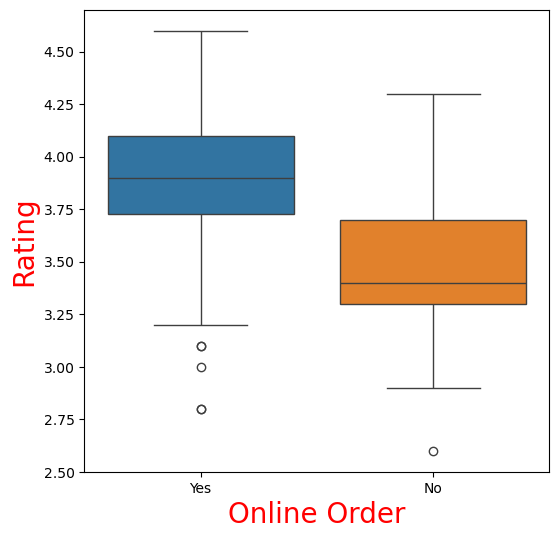

In [245]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rating', data = df, hue='online_order')
plt.xlabel('Online Order', c='red', size=20)
plt.ylabel('Rating', c='red', size=20)
plt.show()

### CONCLUSION: 
#### Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

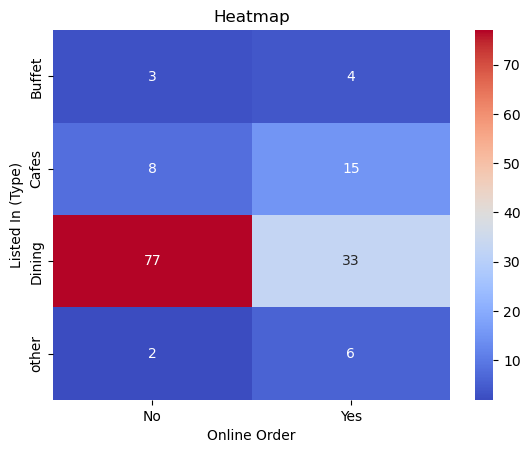

In [261]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

## Conclusion

#### Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. 
#### This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.